In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')

In [3]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
df.shape

(215, 15)

# Summarizing the data

In [5]:
categorical_vars = df.select_dtypes(include=['object','bool'])

In [6]:
categorical_vars.describe()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


In [8]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# Performing EDA

<AxesSubplot:ylabel='gender'>

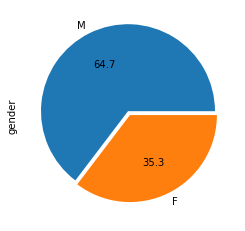

In [10]:
df['gender'].value_counts().plot(kind ='pie',autopct = '%.1f',explode=[0.05,0])

<AxesSubplot:xlabel='gender', ylabel='count'>

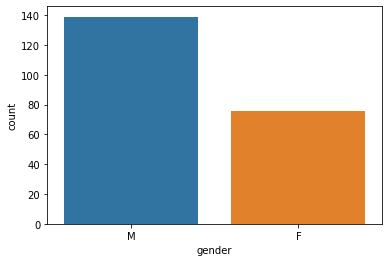

In [12]:
sns.countplot(data = df, x = 'gender')

As visualized above, the percentage of male is 64.7 and female is 35.3

### Checking the disrtibution of students of three streams in 12th grade

<AxesSubplot:ylabel='hsc_s'>

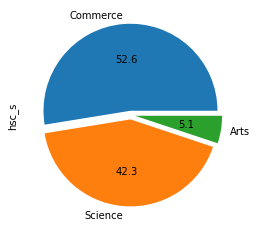

In [15]:
df['hsc_s'].value_counts().plot(kind ='pie',autopct = '%.1f',explode=[0.05, 0.05, 0.05])

The student distribution from each three streams are as follows
* Commerce = 52.6%
* Arts = 5.1%
* Science = 42.3%

### Checking the student distribution in under graduate degree

<AxesSubplot:ylabel='degree_t'>

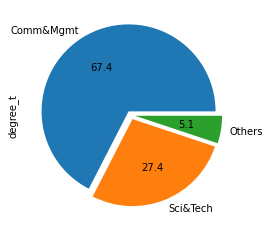

In [16]:
df['degree_t'].value_counts().plot(kind ='pie',autopct = '%.1f',explode=[0.05, 0.05, 0.05])

Student distribution in under graduate degrees are as follows
 * Commerce and Management = 67.44%
 * Science and Technology = 27.4% 
 * Others = 5.1%

### Analyzing student distribution by gender in three streams in 12th grade

<AxesSubplot:xlabel='count', ylabel='hsc_s'>

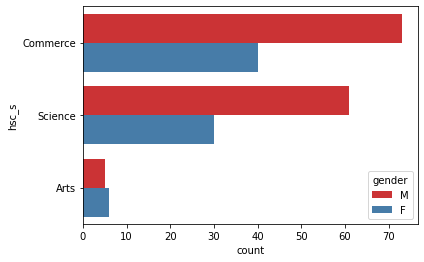

In [18]:
sns.countplot(y = 'hsc_s',hue = df['gender'], palette = "Set1", data = df)

# Data Cleaning

In [19]:
df = df.drop(columns=['sl_no'])

In [20]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [21]:
df.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

### Finding and filling null values

In [22]:
df.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [24]:
null_rows = df[df.isnull().any(axis=1)]

In [25]:
null_rows

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


### Filling null values in salary with 0

In [27]:
df['salary'].fillna(0, inplace=True)

In [28]:
print('null values in salary column:',df['salary'].isnull().sum())

null values in salary column: 0


In [29]:
df.isna().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

### Changing Workex column's value to True and False

In [30]:
df['workex'].replace(['Yes','No'], [True,False], inplace=True)

In [31]:
df[['workex']]

,workex
0,False
1,True
2,False
3,False
4,False
...,...
210,False
211,False
212,True
213,False


### Changing Status column's value to True and False

In [32]:
df['status'].replace(['Placed', 'Not Placed'], [True,False], inplace=True)

In [33]:
df[['status']]

,status
0,True
1,True
2,True
3,False
4,True
...,...
210,True
211,True
212,True
213,True


### Removing outliers from the salary column

In [34]:
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1   
#IQR is interquartile range. 

In [35]:
filter = (df['salary'] >= Q1 - 1.5 * IQR) & (df['salary'] <= Q3 + 1.5 *IQR)
df_filtered= df.loc[filter]

In [36]:
df_filtered

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,False,55.0,Mkt&HR,58.80,True,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,True,86.5,Mkt&Fin,66.28,True,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,False,75.0,Mkt&Fin,57.80,True,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,False,66.0,Mkt&HR,59.43,False,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,False,96.8,Mkt&Fin,55.50,True,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,False,91.0,Mkt&Fin,74.49,True,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,False,74.0,Mkt&Fin,53.62,True,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,True,59.0,Mkt&Fin,69.72,True,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,False,70.0,Mkt&HR,60.23,True,204000.0


Text(0.5, 1.0, 'After removing outliers(salary)')

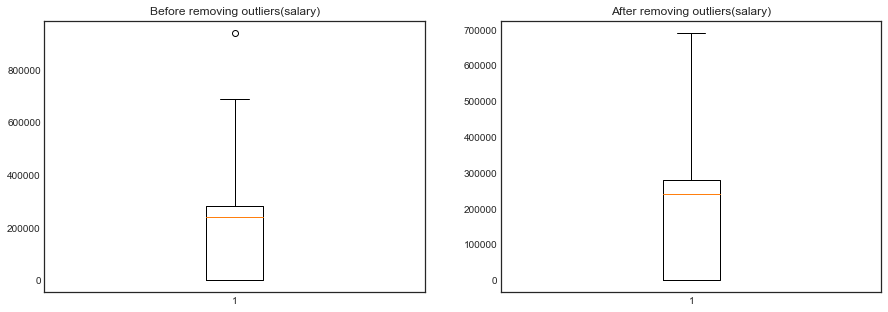

In [37]:
plt.figure(figsize = (15, 5))
plt.style.use('seaborn-white')
ax=plt.subplot(121)
plt.boxplot(df['salary'])
ax.set_title('Before removing outliers(salary)')
ax=plt.subplot(122)
plt.boxplot(df_filtered['salary'])
ax.set_title('After removing outliers(salary)')

<AxesSubplot:>

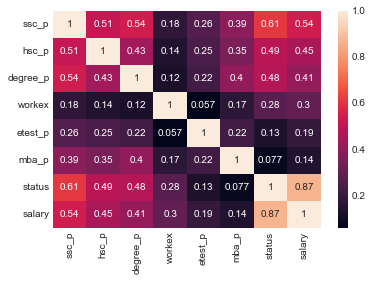

In [38]:
sns.heatmap(df.corr(), annot=True)

#### Converting the degree_t column's value into different column and append value as 0 if the row does not has that degree and 1 if the row has that degree.

In [40]:
# Split the values in the column at the '&' character
degree_split_df = df['degree_t'].str.split('&', expand=True)

# Flatten the resulting DataFrame
degree_split_df = degree_split_df.stack().reset_index(level=1, drop=True)

# Use pd.get_dummies to convert the values into separate columns with binary values
degree_split_df = pd.get_dummies(degree_split_df)


In [41]:
degree_split_df

,Comm,Mgmt,Others,Sci,Tech
0,0,0,0,1,0
0,0,0,0,0,1
1,0,0,0,1,0
1,0,0,0,0,1
2,1,0,0,0,0
...,...,...,...,...,...
212,0,1,0,0,0
213,1,0,0,0,0
213,0,1,0,0,0
214,1,0,0,0,0


#### Convert the specialisation column's value into different column and append value as 0 if the row does not has that degree and 1 if the row has that degree


In [43]:
# Split the values in the column at the '&' character
specialisation_split_df = df['specialisation'].str.split('&', expand=True)

# Flatten the resulting DataFrame
specialisation_split_df = specialisation_split_df.stack().reset_index(level=1, drop=True)

# Use pd.get_dummies to convert the values into separate columns with binary values
specialisation_split_df = pd.get_dummies(specialisation_split_df)

In [44]:
specialisation_split_df

,Fin,HR,Mkt
0,0,0,1
0,0,1,0
1,0,0,1
1,1,0,0
2,0,0,1
...,...,...,...
212,1,0,0
213,0,0,1
213,0,1,0
214,0,0,1


#### Joining the degree split and specialisation split to df

In [45]:
df = df.join([degree_split_df,specialisation_split_df])

In [46]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,...,status,salary,Comm,Mgmt,Others,Sci,Tech,Fin,HR,Mkt
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,False,55.0,...,True,270000.0,0,0,0,1,0,0,0,1
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,False,55.0,...,True,270000.0,0,0,0,1,0,0,1,0
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,False,55.0,...,True,270000.0,0,0,0,0,1,0,0,1
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,False,55.0,...,True,270000.0,0,0,0,0,1,0,1,0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,True,86.5,...,True,200000.0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,False,70.0,...,True,204000.0,0,1,0,0,0,0,1,0
214,M,62.00,Central,58.00,Others,Science,53.00,Comm&Mgmt,False,89.0,...,False,0.0,1,0,0,0,0,0,0,1
214,M,62.00,Central,58.00,Others,Science,53.00,Comm&Mgmt,False,89.0,...,False,0.0,1,0,0,0,0,0,1,0
214,M,62.00,Central,58.00,Others,Science,53.00,Comm&Mgmt,False,89.0,...,False,0.0,0,1,0,0,0,0,0,1


#### Converting a necessary column's data type to boolean

In [48]:
df['workex'] = df['workex'].astype(bool)
df['status'] = df['status'].astype(bool)
df['Comm'] = df['Comm'].astype(bool)
df['Mgmt'] = df['Mgmt'].astype(bool)
df['Others'] = df['Others'].astype(bool)
df['Sci'] = df['Sci'].astype(bool)
df['Tech'] = df['Tech'].astype(bool)
df['Fin'] = df['Fin'].astype(bool)
df['HR'] = df['HR'].astype(bool)
df['Mkt'] = df['Mkt'].astype(bool)

# Answering the questions

#### 1) Who is getting more salary on the basis of Gender?

In [63]:
def percentageCalc(number1, number2):

    percentage_difference = 100 * (abs(number1 - number2) / ((number1 + number2) / 2))
    
    return format(percentage_difference)

In [64]:
# Group data by gender
grouped = df.groupby("gender")

# Calculate average salary for each gender group
average_salary = grouped["salary"].mean()

# Print average salary for each gender group
print(average_salary)
print(percentageCalc(218066,167863))

gender
F    167863.013699
M    218065.934066
Name: salary, dtype: float64
26.01670255409674


#### 2) Which specialization has more job placement?

In [49]:
df
marketing_placements = (df['Mkt'].eq(True) & df['status'].eq(True)).sum()
finance_placements = (df['Fin'].eq(True) & df['status'].eq(True)).sum()
hr_placements = (df['HR'].eq(True) & df['status'].eq(True)).sum()

In [50]:
print(marketing_placements)
print(finance_placements)
print(hr_placements)

291
188
103


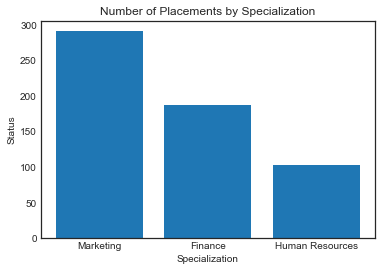

In [51]:
# Plot the results
placements = [marketing_placements, finance_placements, hr_placements]
specializations = ['Marketing', 'Finance', 'Human Resources']
plt.bar(specializations, placements)
plt.xlabel("Specialization")
plt.ylabel("Status")
plt.title("Number of Placements by Specialization")
plt.show()

#### 3) Which specialization is getting more salary?

In [65]:
marketing_salary = df[df['Mkt'] == 1]['salary'].mean()
finance_salary = df[df['Fin'] == 1]['salary'].mean()
hr_salary = df[df['HR'] == 1]['salary'].mean()

In [66]:
# display the results
print("Average salary for marketing:", marketing_salary)
print("Average salary for finance:", finance_salary)
print("Average salary for human resources:", hr_salary)

Average salary for marketing: 200572.7923627685
Average salary for finance: 238059.3220338983
Average salary for human resources: 152229.50819672132


#### 4) Which hsc_s gets more salary on the basis of gender?

In [68]:
# Group data by hsc_s module
grouped = df.groupby("hsc_s")

# Calculate average salary for each hsc_s module group
average_salary = grouped["salary"].mean()

print(average_salary)

hsc_s
Arts        135777.777778
Commerce    201831.111111
Science     205590.909091
Name: salary, dtype: float64


#### 5) Who has high job placement on the basis of degree_t and gender?

In [69]:
grouped = df.groupby(["degree_t", "gender"])["status"].agg("sum")
result = grouped.reset_index().sort_values("status", ascending=False)
result

,degree_t,gender,status
0,Comm&Mgmt,F,96
1,Comm&Mgmt,M,96
5,Sci&Tech,M,52
4,Sci&Tech,F,24
3,Others,M,8
2,Others,F,4


#### 6) Which gender has high work experience?

In [72]:
gender_work_experience = df.groupby("gender")["workex"].sum()
result = gender_work_experience.reset_index().sort_values("gender", ascending=False)
result

,gender,workex
1,M,204
0,F,84


#### 7) Which specialization is getting more salary in the basis of degree_t?

In [73]:
results = []

for degree in ['Comm&Mgmt', 'Sci&Tech', 'Others']:
    MktBasedOnDegree = df[(df['Mkt'] == True) & (df['degree_t'] == degree)]['salary'].mean()
    FinBasedOnDegree = df[(df['Fin'] == True) & (df['degree_t'] == degree)]['salary'].mean()
    HRBasedOnDegree = df[(df['HR'] == True) & (df['degree_t'] == degree)]['salary'].mean()                             

    results.append({
        'degree': degree,
        'Mkt': MktBasedOnDegree,
        'Fin': FinBasedOnDegree,
        'HR': HRBasedOnDegree
    })


In [74]:
dfr = pd.DataFrame(results)
dfr

,degree,Mkt,Fin,HR
0,Comm&Mgmt,196000.000000,229337.209302,147406.779661
1,Sci&Tech,218627.118644,268933.333333,166586.206897
2,Others,127454.545455,150000.000000,114571.428571


#### 8) Which degree_t is placed more?

In [55]:
degree_job_placement = df.groupby("degree_t")["status"].sum()
result = degree_job_placement.reset_index().sort_values("status", ascending=False)

In [56]:
result

,degree_t,status
0,Comm&Mgmt,192
2,Sci&Tech,76
1,Others,12


#### 9) Which degree_t is getting low salary?

In [58]:
# removing the outliers in salary 
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1 

In [59]:
filter = (df['salary'] >= Q1 - 1.5 * IQR) & (df['salary'] <= Q3 + 1.5 *IQR)
df_filtered = df.loc[filter]

In [61]:
#Finding the degree_t with salary below average salary
average_salary = df_filtered['salary'].mean()
low_salary_degree = df['degree_t'][df['salary'] < average_salary].value_counts()
result = low_salary_degree.reset_index()

In [62]:
result

,index,degree_t
0,Comm&Mgmt,172
1,Sci&Tech,72
2,Others,12


#### 10) Which degree_t is has low job placement?

In [77]:
df['status'] = df['salary'] < df['salary'].mean()

degree_counts = df.groupby(['degree_t', 'status']).size().reset_index(name='count')
degree_counts = degree_counts[degree_counts['status'] == True]

degree_counts.sort_values(by='count', ascending=True)

,degree_t,status,count
3,Others,True,12
5,Sci&Tech,True,76
1,Comm&Mgmt,True,192
